1.Import packages

In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
#from zfel import sase1d_input_part
from zfel import sase1d_input_part

2.Input parameters

In [2]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 30                    # n-sample points along bunch length
z_steps = 30                    # n-sample points along undulator
energy  = 4313.34*1E6               # electron energy [eV]
eSpread = 0#1.0e-4                  # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3400                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
#unduK = 3.5                        # undulator parameter, K [ ]
unduK = np.ones(z_steps)*3.5 #np.arange(3.52,3.48,-0.04/(z_steps-1))#   # tapered undulator parameter, K [ ]
if unduK.shape[0]!=z_steps:
    print('Wrong! Number of steps should always be the same as z_steps')
unduL = 70#30                       # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 'sase'                       # 'sase' or 'seeded'
P0 = 10000*0.0                      # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No
particle_position=None #genfromtxt('./Inputs/particle_position.csv', delimiter=',') # or None  
# particle information with positions in meter and eta,\
# if we want to load random particle positions and energy, then set None
hist_rule='square-root'             # 'square-root' or 'sturges' or 'rice-rule' or 'self-design', number \
                                    #  of intervals to generate the histogram of eta value in a bucket

In [3]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed,'particle_position':particle_position,'hist_rule':hist_rule}

3.1D FEL run

In [4]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,eta_out,bunching,spectrum,freq,Ns,history=sase1d_input_part.sase(inp_struct)

4.Print or plot the output

Text(0, 0.5, 'spectrum (W)')

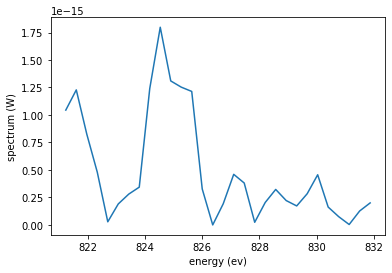

In [5]:
# plot spectrum
plt.plot(freq,spectrum[1:,-1])
plt.xlabel('energy (ev)')
plt.ylabel('spectrum (W)')

/Users/xiao/Desktop/data/RL/github_repo/zfel/zfel/sase1d_input_part.py:250: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z,np.log10(power_z))
/Users/xiao/Desktop/data/RL/github_repo/zfel/zfel/sase1d_input_part.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


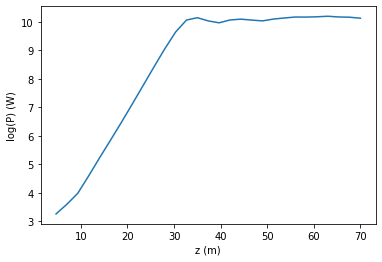

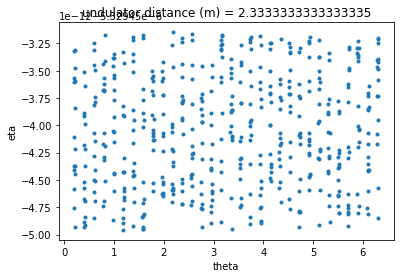

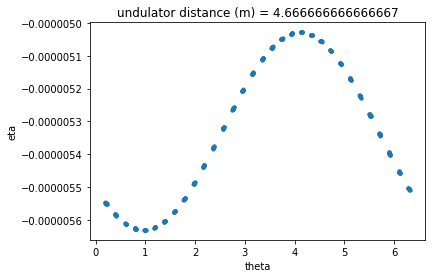

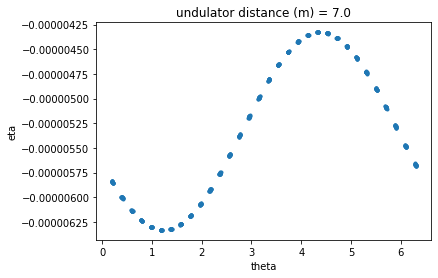

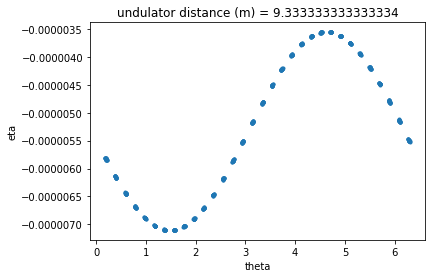

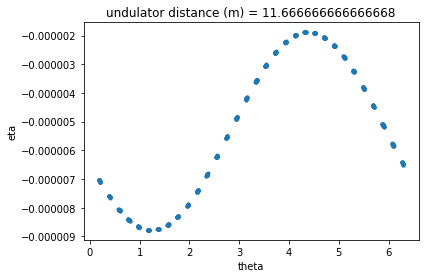

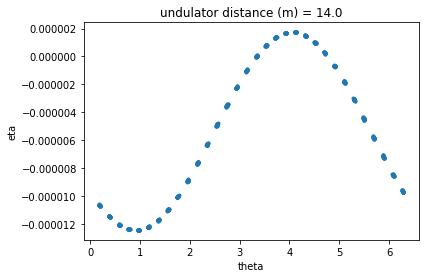

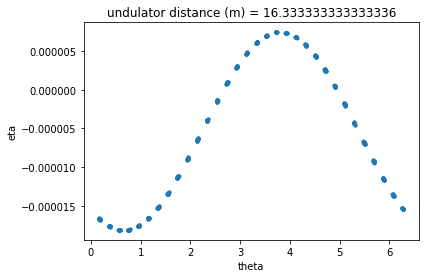

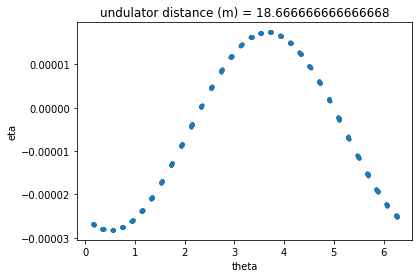

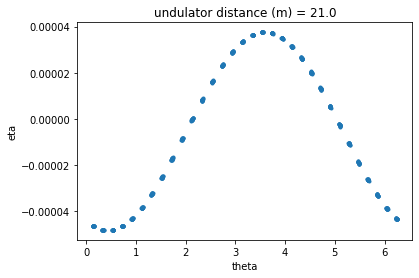

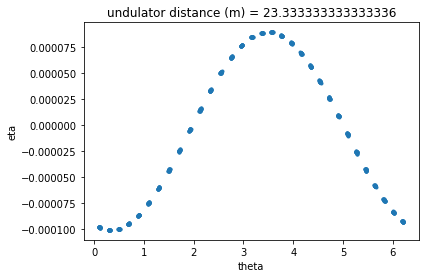

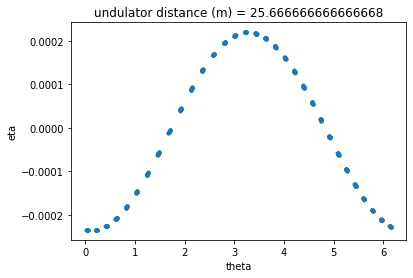

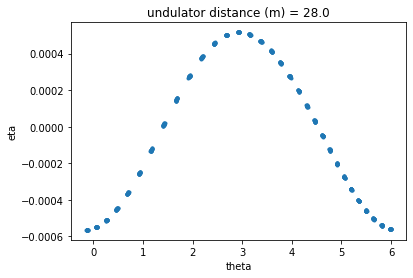

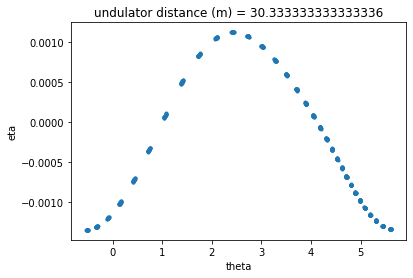

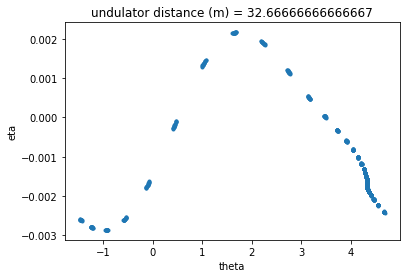

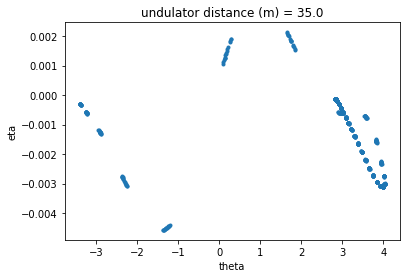

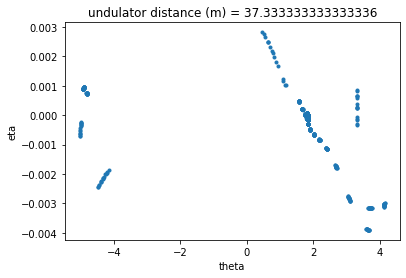

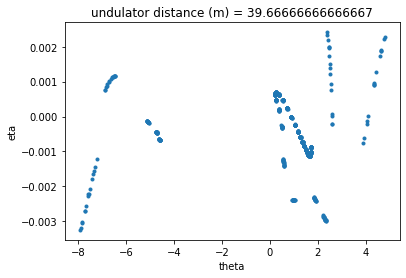

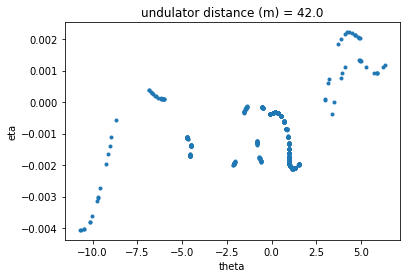

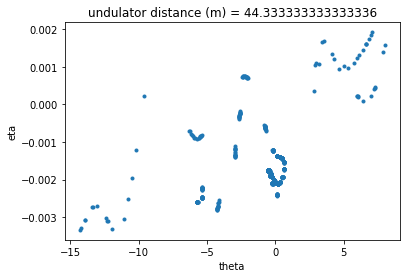

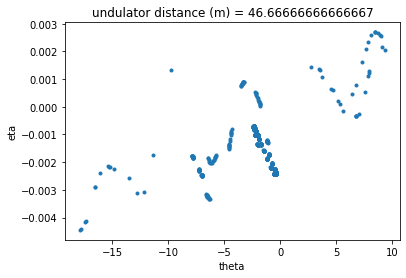

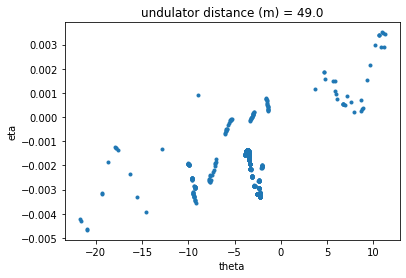

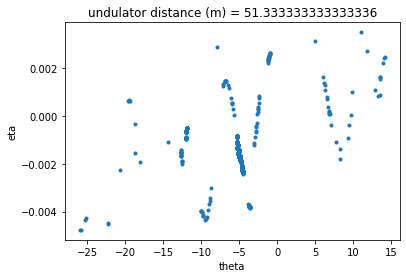

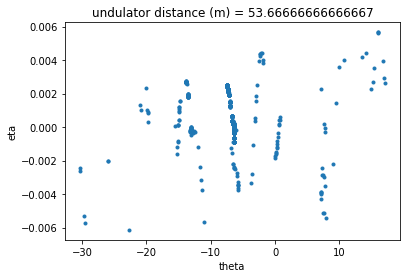

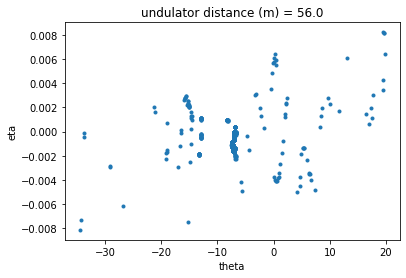

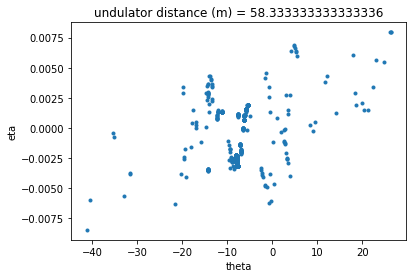

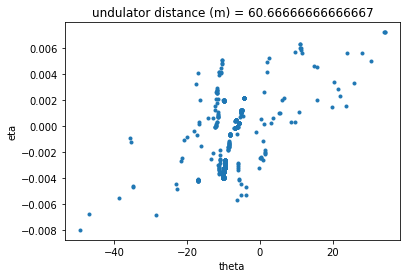

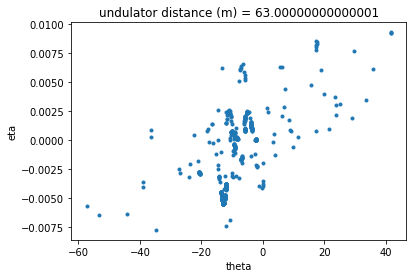

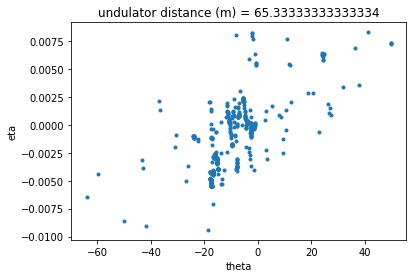

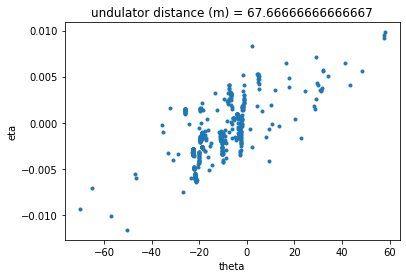

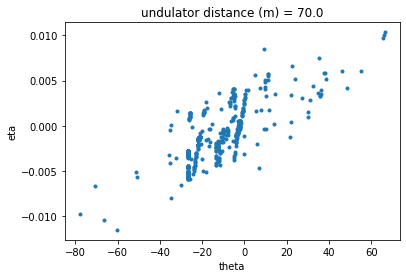

In [6]:
if iopt == 5:
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_power_s(history)
    sase1d_input_part.plot_phase_space(history)
else:
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_phase_space(history)

In [8]:
print(bunching[:,0])
print(np.sqrt(np.mean(np.absolute(bunching[:,0])**2)))
print(1/np.sqrt(Ns))

[ 3.80901516e-04+1.63381908e-04j -4.43880630e-04-1.85419052e-04j
  4.98988279e-04-1.18276998e-04j  3.68286137e-04+6.23868021e-04j
  1.09820957e-05+7.95798421e-05j  4.01079783e-04-9.37271745e-04j
 -3.54788380e-04+9.39689156e-04j -1.10788225e-03+2.54389240e-05j
  1.00415769e-04+5.99291878e-04j  5.29104751e-04+4.77451273e-04j
 -1.41440339e-05+1.03168315e-04j -1.13983962e-04+3.05279895e-05j
  9.64008223e-04+2.62302867e-04j  4.67398242e-05-1.95647868e-04j
  6.64078396e-04+3.34462917e-04j -4.90926491e-04+2.31243389e-04j
 -9.87017868e-05-1.48420959e-03j -1.93642836e-03+4.92851588e-04j
  1.94361166e-04+1.13721126e-03j  8.64790942e-04-7.81399109e-04j
 -1.92109940e-03-4.80545194e-04j -6.88962516e-04-5.14691607e-04j
 -6.30715034e-04-1.45889194e-03j  3.21317869e-04-1.02098572e-04j
 -8.55417020e-04+4.99241173e-04j  2.59489593e-04+5.87688017e-04j
  7.44053949e-05+2.52578605e-04j -1.08743554e-03-2.62234137e-04j
 -9.66772428e-05-7.00300815e-04j  5.25130784e-04-7.83853781e-04j
  3.55731949e-04-1.312828

In [9]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,eta_out)

[0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846
 0.00099846 0.00099846 0.00099846 0.00099846 0.00099846 0.0009

In [10]:
print(z)
print(power_z)
print(s)
print(power_s)
print(field)
print(field_s)
print(bunching)

[ 0.35  0.7   1.05  1.4   1.75  2.1   2.45  2.8   3.15  3.5   3.85  4.2
  4.55  4.9   5.25  5.6   5.95  6.3   6.65  7.    7.35  7.7   8.05  8.4
  8.75  9.1   9.45  9.8  10.15 10.5  10.85 11.2  11.55 11.9  12.25 12.6
 12.95 13.3  13.65 14.   14.35 14.7  15.05 15.4  15.75 16.1  16.45 16.8
 17.15 17.5  17.85 18.2  18.55 18.9  19.25 19.6  19.95 20.3  20.65 21.
 21.35 21.7  22.05 22.4  22.75 23.1  23.45 23.8  24.15 24.5  24.85 25.2
 25.55 25.9  26.25 26.6  26.95 27.3  27.65 28.   28.35 28.7  29.05 29.4
 29.75 30.1  30.45 30.8  31.15 31.5  31.85 32.2  32.55 32.9  33.25 33.6
 33.95 34.3  34.65 35.   35.35 35.7  36.05 36.4  36.75 37.1  37.45 37.8
 38.15 38.5  38.85 39.2  39.55 39.9  40.25 40.6  40.95 41.3  41.65 42.
 42.35 42.7  43.05 43.4  43.75 44.1  44.45 44.8  45.15 45.5  45.85 46.2
 46.55 46.9  47.25 47.6  47.95 48.3  48.65 49.   49.35 49.7  50.05 50.4
 50.75 51.1  51.45 51.8  52.15 52.5  52.85 53.2  53.55 53.9  54.25 54.6
 54.95 55.3  55.65 56.   56.35 56.7  57.05 57.4  57.75 58.1  58.45